# ICT1508C Applied Statistics

*Programming Assignment*

>Student ID:   &emsp;&ensp;Your ID<br>
>Student name: Your name<br>
>Filename:     &emsp;&emsp;`ICT1508C_Programming-Assignment_v2420-O.ipynb`<br>
>Variant:      &emsp;&emsp;&ensp;&ensp;Original<br>
>Version:      &emsp;&emsp;&ensp; `2420-O-1.0`<br>
>Description:  &ensp;&ensp;Jupyter notebook for ICT1508C Programming Assignment.<br>
>Module:       &emsp;&emsp;&ensp;ICT1508C<br>
>Type:         &emsp;&emsp;&emsp;&ensp; Assignment<br>
>Prepared by:  &ensp;Nicholas H L Wong<br>
>Organisation: &nbsp;Singapore Institute of Technology<br>
>Division:     &emsp;&emsp;&ensp;Infocomm Technology<br>
>Attribution:  &emsp;Copyright &copy; 2025 Nicholas H L Wong – All Rights Reserved<br>

## Instructions

This is the Programming Assignment for ICT1508C Applied Statistics, 2025. Follow the instructions carefully.
- Go through this Jupyter notebook sequentially, answering each **[Task]** or **[Q]** (question) along the way.
- For each programming **[Task]**, write your code in the cell commented with `# TODO: Write your code here. #`, immediately below the task. You may add additional code cells if needed immediately below this code cell.
- For each open-ended question **[Q]**, type your answer in the markdown cell immediately below the question. Enclose your answer within the markdown `<span style="color:green"> ... </span>` to colour the font green (replace the text "<span style="color:green">Your answer</span>" with your actual answer). Use separate markdown blocks for different lines.
- **Do not** delete any existing markdown or code cells.
- While there may be other functions from other packages that may solve the various tasks, for this assignment, you are to restrict your implementations to only those packages that we have covered in the lessons. The necessary packages will have been imported for you below, and you will not need to import additional packages.
- If you referenced anything (e.g., from the web, etc.), cite the source(s) as comments in your code at the appropriate positions.

## Setup

In [1]:
# Import some packages
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Data preparation

The dataset `2014_and_2015_CSM_dataset.csv` contains data on Hollywood movies released in 2014 and 2015 with conventional and social media (CSM) features.

Ref.: https://doi.org/10.24432/C5SP5T

Run the following cell to read in the data into a pandas dataframe called `data_raw` and display it. *Note that this assumes that the data file is in the same directory as this Jupyter notebook.*

In [2]:
# Read the data into a dataframe
data_raw = pd.read_csv("2014_and_2015_CSM_dataset.csv", sep=',', header=0)
data_raw

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,Comedy,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,Action,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,Action,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,Action,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,Comedy,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Child 44,2015,6.4,Thriller,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN
227,Aloha,2015,5.5,Horror,21000000,37000000.0,2815.0,1,13,7119456,18803,1128,2290,NaN
228,Unfinished Business,2015,5.4,Comedy,10200000,35000000.0,2777.0,1,7,3450614,6823,325,409,NaN
229,War Room,2015,5.4,Action,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


We need to clean up the data to remove the `"na"` or blank values and also convert the numeric columns to float type. We will also divide the `Budget` column by 1,000,000 so that the amount is in terms of millions of US$. Note that the other columns are still in the original units (e.g., `Gross` is still in US$, not millions of US$).

Run the following cell to do these.

In [3]:
# List of column names
names = ['Movie', 'Year', 'Ratings', 'Genre', 'Gross', 'Budget', 
         'Screens', 'Sequel', 'Views', 'Likes', 'Dislikes']

# Extract out the columns we want. Also, remove any row that has missing (NaN) values.
data_clean = data_raw[names].dropna()

# Scale the `Budget' column
data_clean['Budget'] = data_clean['Budget'] / 1000000

data_clean

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Views,Likes,Dislikes
0,13 Sins,2014,6.3,Comedy,9130,4.0,45.0,1,3280543,4632,425
1,22 Jump Street,2014,7.1,Action,192000000,50.0,3306.0,2,583289,3465,61
2,3 Days to Kill,2014,6.2,Action,30700000,28.0,2872.0,1,304861,328,34
3,300: Rise of an Empire,2014,6.3,Action,106000000,110.0,3470.0,2,452917,2429,132
4,A Haunted House 2,2014,4.7,Comedy,17300000,3.5,2310.0,2,3145573,12163,610
...,...,...,...,...,...,...,...,...,...,...,...
225,The Second Best Exotic Marigold Hotel,2015,6.6,Action,33100000,10.0,1573.0,2,831044,2427,99
226,Child 44,2015,6.4,Thriller,1210000,50.0,66.0,1,3701061,9325,641
227,Aloha,2015,5.5,Horror,21000000,37.0,2815.0,1,7119456,18803,1128
228,Unfinished Business,2015,5.4,Comedy,10200000,35.0,2777.0,1,3450614,6823,325


From here on, we can use `data_clean` as a starting point for the subsequent analyses.

## Part 2: Exploratory data analysis

We wish to compare the distributions of the `Budget` for the various movie genres.

#### **[Task 1]**: Display an array of histograms of `Budget`, grouping by `Genre`. Use 15 bins and set both `sharex` and `sharey` to `True`. Make sure to include appropriate axis labels.

You should end up with three histograms arranged in a 3-by-3 grid.

**(7 marks)**

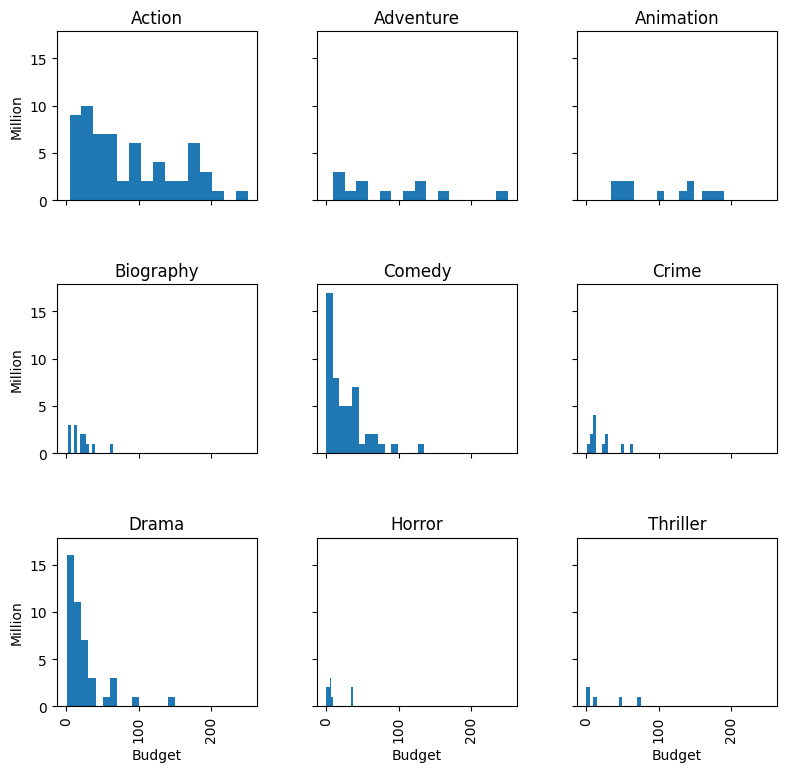

In [4]:
histarr = data_clean.hist(column='Budget', by='Genre', grid=True, sharex=True, sharey=True, bins=15, figsize=(9,9))

for ax in histarr.flatten():
    ax.set_xlabel("Budget")
    ax.set_ylabel("Million")


## Part 3: Relationship of gross earnings to other factors

The gross earnings (in US$) of a movie can be used to gauge its box office success. We are interested to know how the gross is related to various factors, such as the movie genre and how many views the movie's social media page got.

We want to see how `Gross` depends on `Genre` and `Views`.

Run the following cell to create the training dataset. Note that we are **not** going to extract out a testing dataset from the training dataset.

In [5]:
# Create training dataset
X_train = data_clean[['Genre', 'Views']]
y_train = data_clean['Gross']

#### **[Task 2]**: Perform linear regression with `Gross` as the dependent variable, and `Genre` and `Views` as the independent variables. Save the fitted model into a variable called `lin_reg`.

Hints:
- We will want the regression summary later. Decide on an appropriate package to use that will give us this information.
- Remember to convert the categorical variable `Genre` to dummy variables. Use `Action` as the base case.

**(9 marks)**

In [6]:
X_train_dummy = pd.get_dummies(X_train, columns=['Genre'], prefix="Genre", drop_first=True, dtype=float)

X_train_dummy = sm.add_constant(X_train_dummy)

lin_reg = sm.OLS(y_train, X_train_dummy).fit()

#### **[Task 3]**: Display the estimated regression coefficients, including the intercept.

**(2 marks)**

In [7]:
print("Regression Coefficients and Intercept (const):")
print(lin_reg.params)

Regression Coefficients and Intercept (const):
const              1.059193e+08
Views              3.128001e+00
Genre_Adventure    9.423941e+06
Genre_Animation    1.777127e+07
Genre_Biography   -6.943791e+07
Genre_Comedy      -7.127636e+07
Genre_Crime       -8.853032e+07
Genre_Drama       -8.545014e+07
Genre_Horror      -9.207859e+07
Genre_Thriller    -9.981336e+07
dtype: float64


#### **[Task 4]**: Display the regression summary.

**(2 marks)**

In [8]:
print(lin_reg.summary())


                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     7.477
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.81e-09
Time:                        22:03:43   Log-Likelihood:                -4310.3
No. Observations:                 220   AIC:                             8641.
Df Residuals:                     210   BIC:                             8675.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.059e+08   1.13e+07     

#### **[Q 1]**: Interpret the coefficient for `Genre_Crime`.

**(3 marks)**

<span style="color:green">Compared to the `Action` genre, the `Gross` of the `Crime` genre will be about $88530000 less, with all else being fixed</span>

#### **[Q 2]**: Interpret the coefficient for `Genre_Adventure`.

**(3 marks)**

<span style="color:green">Compared to the `Action` genre, the `Gross` of the `Adventure` genre will be about $9424000 more, with all else being fixed</span>


#### **[Q 3]**: Interpret the coefficient for `Views`.

**(3 marks)**

<span style="color:green">For every additional `Views`, the `Gross` will increase by about $3.128, with all else being fixed</span>

#### **[Q 4]**: Interpret the adjusted $r^2$-value.

**(3 marks)**

<span style="color:green">21% of the variation in the dependent variable, `Gross`, is explained by the variation in the independent variables, `Genre` and `Views`</span>

#### **[Task 5]**: Predict how much a `Biography` movie will gross, if it has 1,200,000 (1.2 million) `Views` on its social media page. Display the predicted gross amount.

**(7 marks)**

In [9]:
new_data = pd.DataFrame({
    'Views': [1200000],
    'Genre': ['Biography']
})

new_dummy_var = pd.get_dummies(new_data, columns=['Genre'], prefix='Genre', drop_first=False)

for col in X_train_dummy.columns:
    if col not in new_dummy_var.columns and col != 'const':
        new_dummy_var[col] = 0

new_dummy_var = sm.add_constant(new_dummy_var, has_constant='add')
new_dummy_var = new_dummy_var[X_train_dummy.columns]
predicted_gross = lin_reg.predict(new_dummy_var).item()

print(f"Predicted Gross of Biography genre: ${predicted_gross:.2f}")

# bio_data = data_clean[data_clean['Genre'] == 'Biography']
# avg_views = bio_data['Views'].mean()
# avg_gross = bio_data['Gross'].mean()
# print(f"Average Views for Biography: {avg_views:,.2f}")
# print(f"Average Gross for Biography: ${avg_gross:,.2f}")

Predicted Gross of Biography genre: $40235017.36


#### **[Q 5]**: Do you think this is a reasonable prediction? Why or why not?

**(3 marks)**

<span style="color:green">Yes. If we compare it against the averages in the actual dataset, it is slightly below the average `Gross` which also aligns with it being slightly below `Views`</span>

## Part 4: Analyses of gross earnings and social media page views

### Part 4.1

We want to know if there was a substantial difference in the `Gross` between the various genres, particularly, `Action`, `Comedy`, and `Drama`.

We create a separate dataset with the movies from only these genres. Run the code cell below.

In [10]:
data_clean2 = data_clean[data_clean['Genre'].isin(['Action', 'Comedy', 'Drama'])]

#### **[Task 6]**: Display box-and-whisper plots of `Gross`, grouped by `Genre`. Use the dataset from `data_clean2`. Set the vertical axis label as "`Gross`". Give the vertical axis an appropriate label.

You should end up with three individual box-and-whisper plots all next to one another within the same set of axes.

**(4 marks)**

Text(0, 0.5, 'Gross')

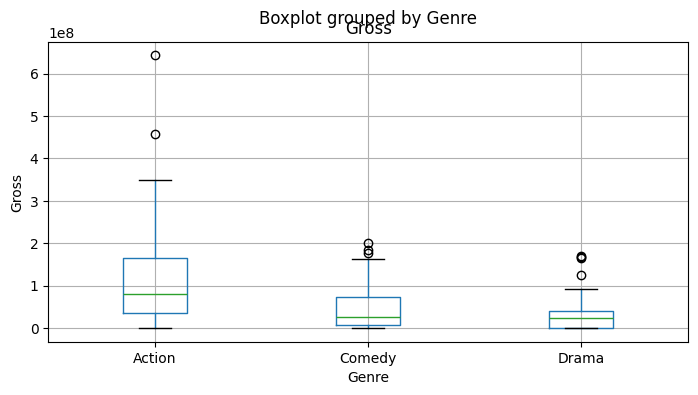

In [11]:
data_clean2.boxplot(column='Gross', by="Genre", grid=True, figsize=(8,4))
plt.ylabel('Gross')

### Part 4.2

We will perform a one-way analysis of variance (ANOVA) on the average gross to see if there were differences across these genres.

Run the following cell to filter the data for this step.

In [12]:
data_aov = data_clean2[['Genre', 'Gross']]
data_aov

,Genre,Gross
0,Comedy,9130
1,Action,192000000
2,Action,30700000
3,Action,106000000
4,Comedy,17300000
...,...,...
222,Action,31600000
223,Comedy,444000
224,Comedy,26400000
225,Action,33100000


#### **[Q 6]** State the null and alternative hypotheses for this ANOVA test.

**(3 marks)**

<span style="color:green">Null Hypothesis: There is no difference in average gross across the genres ( = 0)</span><br/>
<span style="color:green">Alternative Hypothesis: There is at least 1 genre that has a different average gross ( != 0)</span>

$$
  \begin{align*}
    H_0\, &:\, \mu_d = 0 \\
    H_a\, &:\, \mu_d \neq 0
  \end{align*}
$$

#### **[Task 7]**: Perform a one-way ANOVA to compare the average `Gross` across these three different `Genre`s, using the 1% significance level. Display the ANOVA table.

**(7 marks)**

In [13]:
model = ols('Gross ~ C(Genre)', data=data_aov).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df          F        PR(>F)
C(Genre)  2.313326e+17    2.0  15.373967  8.304709e-07
Residual  1.143574e+18  152.0        NaN           NaN


#### **[Task 8]**: Programmatically compare the $p$-value with the stated significance level to see whether the former is less than the latter.

**(3 marks)**

In [14]:
alpha = 0.01
anova_table['PR(>F)'].iloc[0] < alpha
print(anova_table['PR(>F)'].iloc[0] < alpha)

True


#### **[Q 7]** Based on this result, state the conclusion.

**(2 marks)**

<span style="color:green">We reject the Null Hypothesis in favour of the Alternative Hypothesis as at 1%$ significance level, there is sufficient evidence that at least 1 genre has a different average gross</span>

### Part 4.3

We are interested to know if the average gross of `Animation` movies in 2014 and 2015 was more than US$115,000,000 (US$115 million). To do this, we take random samples of 12 observations of animation movies.

Run the following cell to create a separate dataframe of these samples. *Do not change the `random_state`.*

In [15]:
n = 12
data_ani = data_clean[data_clean['Genre']=="Animation"]['Gross'].sample(n, random_state=100)

#### **[Q 8]**: To do a hypothesis test to see if the average gross of `Animation` movies was more than US$115,000,000, state the null and alternative hypotheses.

**(3 marks)**

<span style="color:green">Null Hypothesis: The average gross of `Animation` <= 115000000</span><br/>
<span style="color:green">Alternative Hypothesis: The average gross of `Animation` > 115000000</span>

$$
  \begin{align*}
    H_0\, &:\, \mu \leq 115000000 \\
    H_a\, &:\, \mu > 115000000
  \end{align*}
$$

#### **[Task 9]**: Perform the appropriate hypothesis test to see if the average gross of `Animation` movies was more than US$115,000,000, at the 1% significance level. Display the test result.

**(4 marks)**

In [16]:
mu = 115000000
test = stats.ttest_1samp(data_ani, popmean=mu, alternative='greater')
test

TtestResult(statistic=np.float64(0.37850998888154475), pvalue=np.float64(0.35612759144462447), df=np.int64(11))

#### **[Task 10]**: Programmatically compare the $p$-value with the stated significance level to see whether the former is less than the latter.

**(3 marks)**

In [17]:
alpha = 0.01
test.pvalue < alpha
print(test.pvalue < alpha)


False


#### **[Q 9]** Based on this result, state the conclusion.

**(2 marks)**

<span style="color:green">We fail to reject the Null Hypothesis. At 1% significance level, there is insufficient evidence that that the average gross of `Animation` movies was more than US$115,000,000</span>

### Part 4.4

We now want to model the distribution of the number of social media page views of `Comedy` movies.

Run the following cell to get the relevant data for the sample. Use this dataframe for the subsequent tasks.

In [18]:
data_com = data_clean[data_clean['Genre']=="Comedy"]['Views']

#### **[Task 11]**: Compute and display the sample mean number of social media page views of `Comedy` movies.

**(2 marks)**

In [19]:
print(f"Sample Mean: {data_com.mean()}")

Sample Mean: 3936182.4


#### **[Task 12]**: Compute and display the sample variance of the number of social media page views of `Comedy` movies.

**(2 marks)**

In [20]:
print(f"Sample Variance: {data_com.var(ddof=1)}")

Sample Variance: 11672193665534.486


#### **[Task 13]**: Compute and display the confidence interval of the mean number of social media page views of `Comedy` movies, at the 90% confidence level.

**(5 marks)**

In [21]:
n = len(data_com)
cl = 0.90
alpha = 1 - cl
xbar = data_com.mean()
s = data_com.std(ddof=1)

t_dist = stats.t(df=n-1, loc=xbar, scale=s/np.sqrt(n))
t_dist.interval(cl)
print(f"Confidence Interval: {t_dist.interval(cl)}")

Confidence Interval: (np.float64(3126139.5715496074), np.float64(4746225.228450391))


#### **[Task 14]**: We will model this sample with a normal distribution. We are interested to compare the sample distribution with a normal distribution. For this task, do the following:
- Display the histogram of the sample `data_com`. Set the argument `density=True` to plot the density instead of counts. Set the legend label as "`Data`".
- On the same set of axes, display a normal distribution with the sample mean and variance. Set the legend label as "`Model`". The normal distribution plot should be superimposed on top of your histogram, and it should show up to 6 standard deviations away from either side of the mean.
- Set the horizontal axis label as "`Number of views`".
- Set the vertical axis label as "`Probability`".
- Set the axis title to "`Probability distribution of number of social media page views of comedy movies`".
- Show the legend.

**(10 marks)**

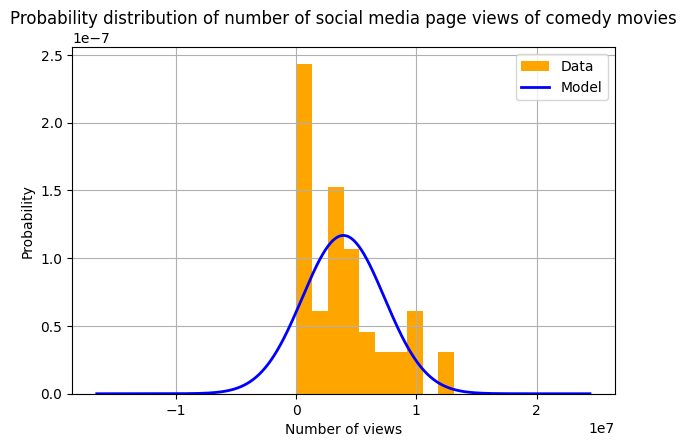

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
ax.hist(data_com, bins=10, density=True, color='orange', label='Data')

sampling_dist = stats.norm(loc=xbar, scale=s)
x_arr = np.linspace(xbar-6*s, xbar+6*s, 1000)  

ax.plot(x_arr, sampling_dist.pdf(x_arr), 'b-', lw=2, label="Model")

ax.set_xlabel('Number of views')
ax.set_ylabel('Probability')
ax.set_title('Probability distribution of number of social media page views of comedy movies')
ax.grid()
ax.legend()

plt.show()

#### **[Task 15]**: Assuming that our sample can be modelled with a normal distribution, compute the probability that for a random `Comedy` movie, the number of social media page views is between 5,000,000 (5 million) and 9,000,000 (9 million). Display this probability.

**(5 marks)**

In [23]:
x1, x2 = 5000000, 9000000
pr = np.diff(sampling_dist.cdf([x1, x2])).item()
print(f"Probability: {pr}")

Probability: 0.30861000803588245


#### **[Task 16]**: Compute and display what is the number of social media page views of `Comedy` movies, where only 20% of such movies have a number of views that is lower than this value.

**(3 marks)**

In [24]:
pr = 0.20
views = sampling_dist.ppf(pr)
print(f"Number of social media page views of Comedy movies: {views}")

Number of social media page views of Comedy movies: 1060817.7689769184


## End

You can come to the end of the programming assignment. Please clear all outputs, restart the kernel, and run your entire notebook one more time from the start. Your notebook should contain all results. Submit your completed Jupyter notebook to the submission folder ahead of the deadline.

We hope you have enjoyed this assignment and the competency unit.